# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: To answer this question I turned to : the sklearn cheat sheet pasted below. We are predicting a category: to predict the likelihood that a given student will pass, quantifying whether an intervention is necessary. Because we are not predicting a quantity and we are given labeled data that makes the best choice classification  ** 

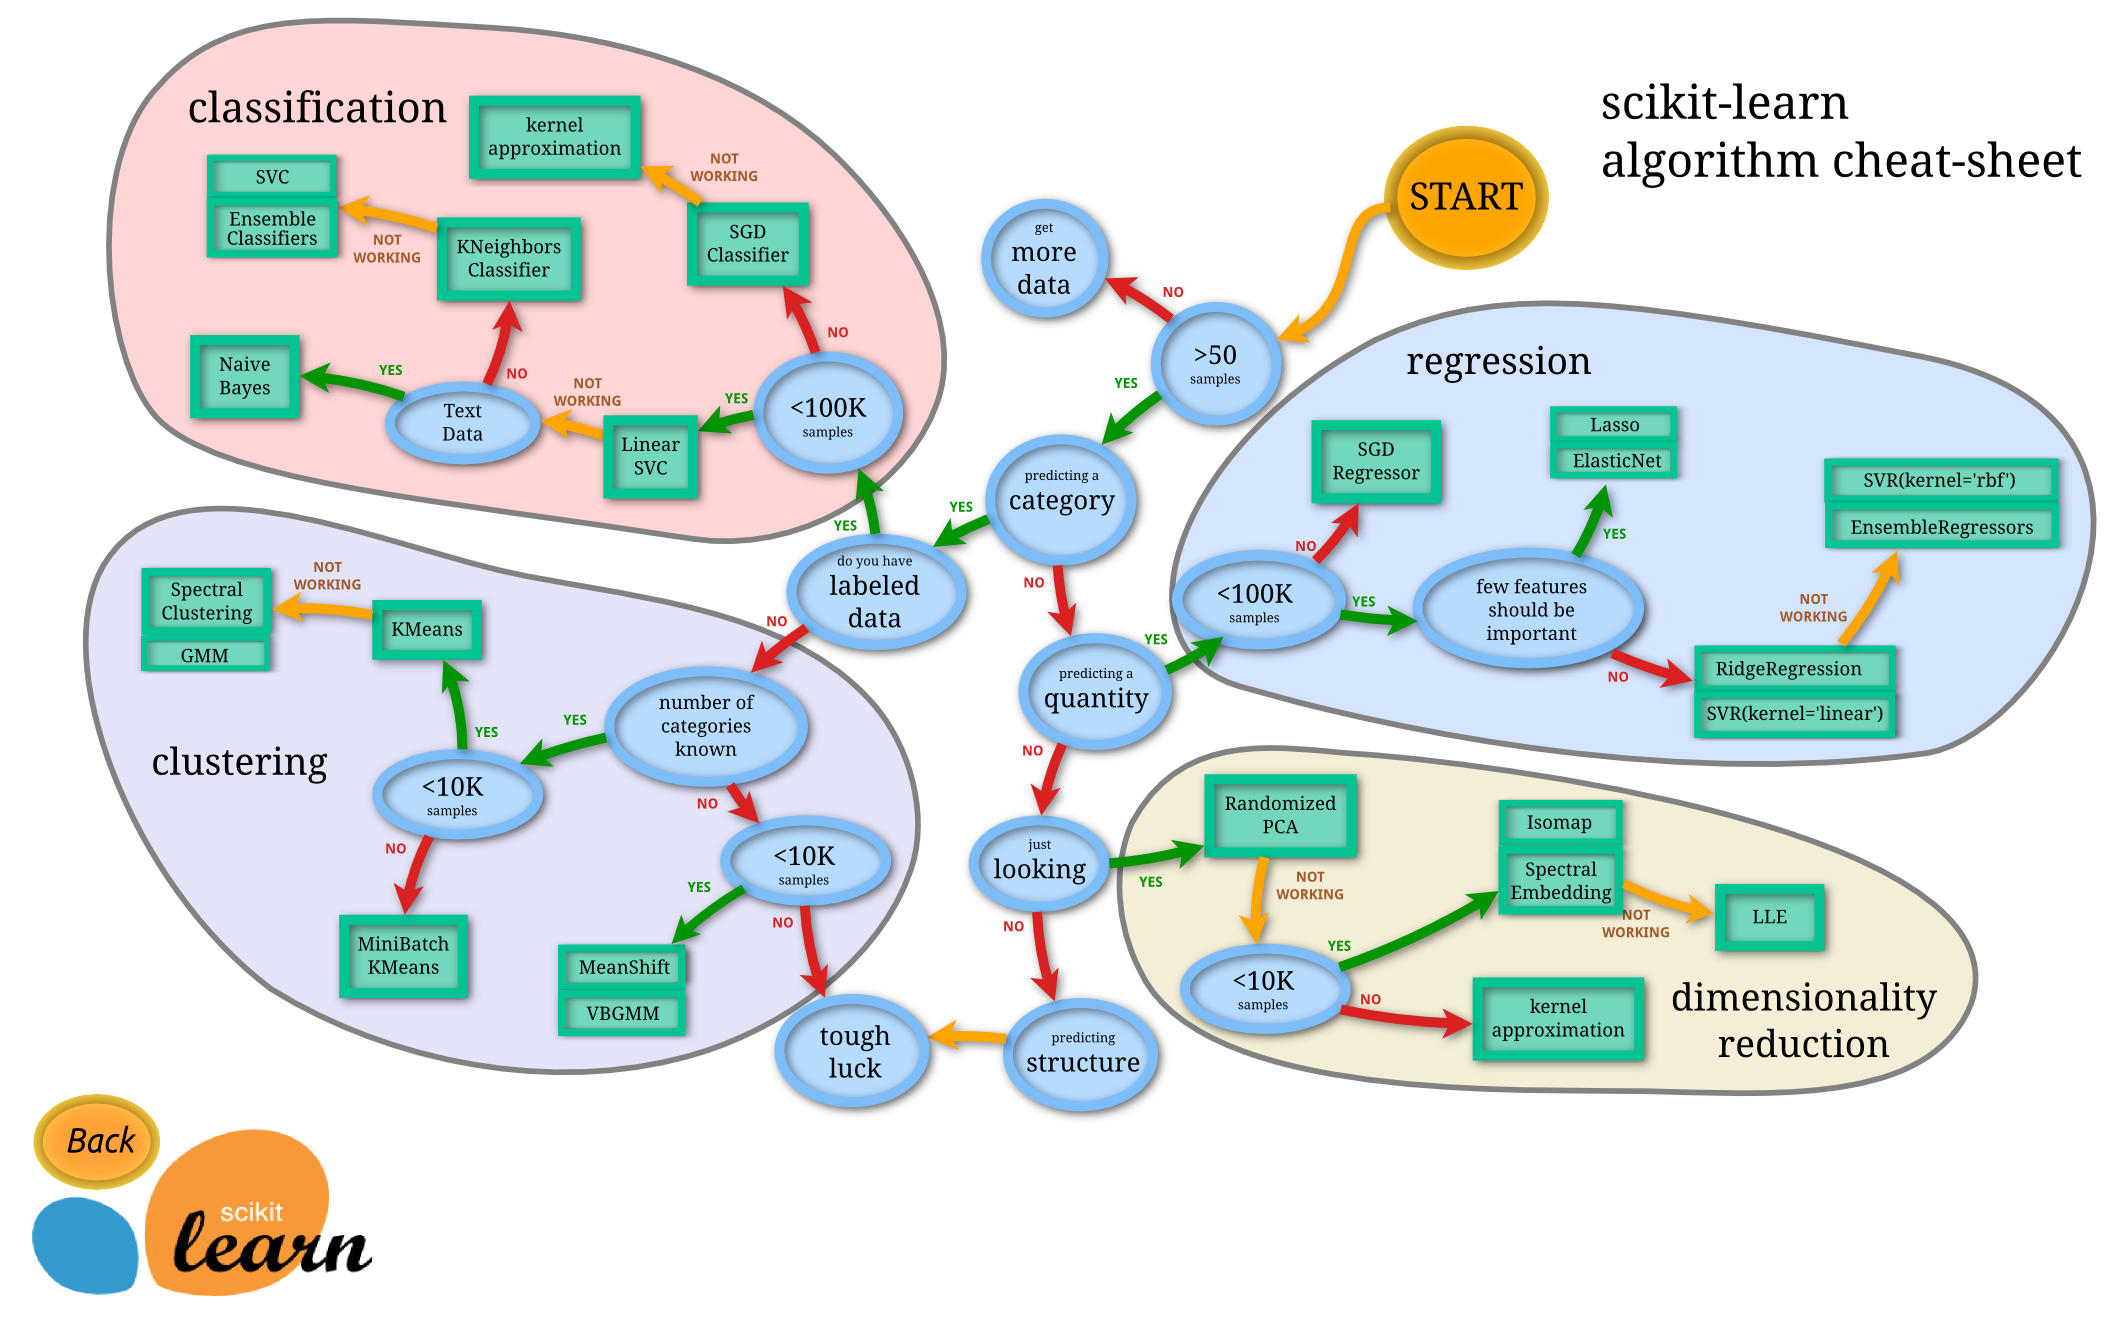

In [88]:
from IPython.core.display import Image
Image(filename=('sklearn.png'))
Image(filename='sklearn.png',width=800,height=400)
# http://scikit-learn.org/stable/tutorial/machine_learning_map/

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [89]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [90]:
print student_data.head(10)
print student_data.describe()
list(student_data.columns.values)

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ...   internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...         no       no       4         3      4    1    1      3   

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'passed']

In [91]:
from sklearn.metrics import f1_score
print "\nF1 score for all 'yes' on students: {:.4f}".format(
    f1_score(y_true = ['yes']*n_passed + ['no']*n_failed, y_pred = ['yes']*n_students, pos_label='yes', average='binary'))


F1 score for all 'yes' on students: 0.8030


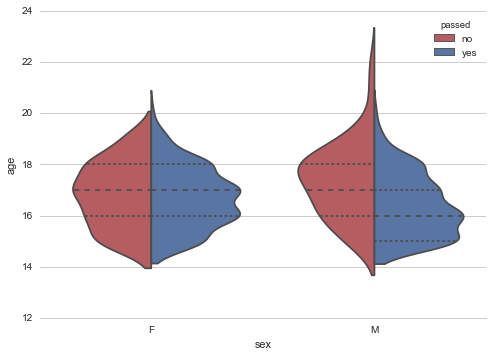

In [93]:
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="sex", y="age", hue="passed", data=student_data, split=True, 
               inner="quart", palette={"yes": "b", "no": "r"})
sns.despine(left=True)

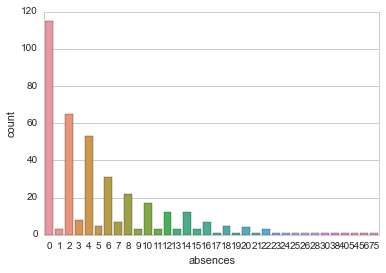

In [110]:
%matplotlib inline
import seaborn as sns
sns.countplot(student_data['absences'])

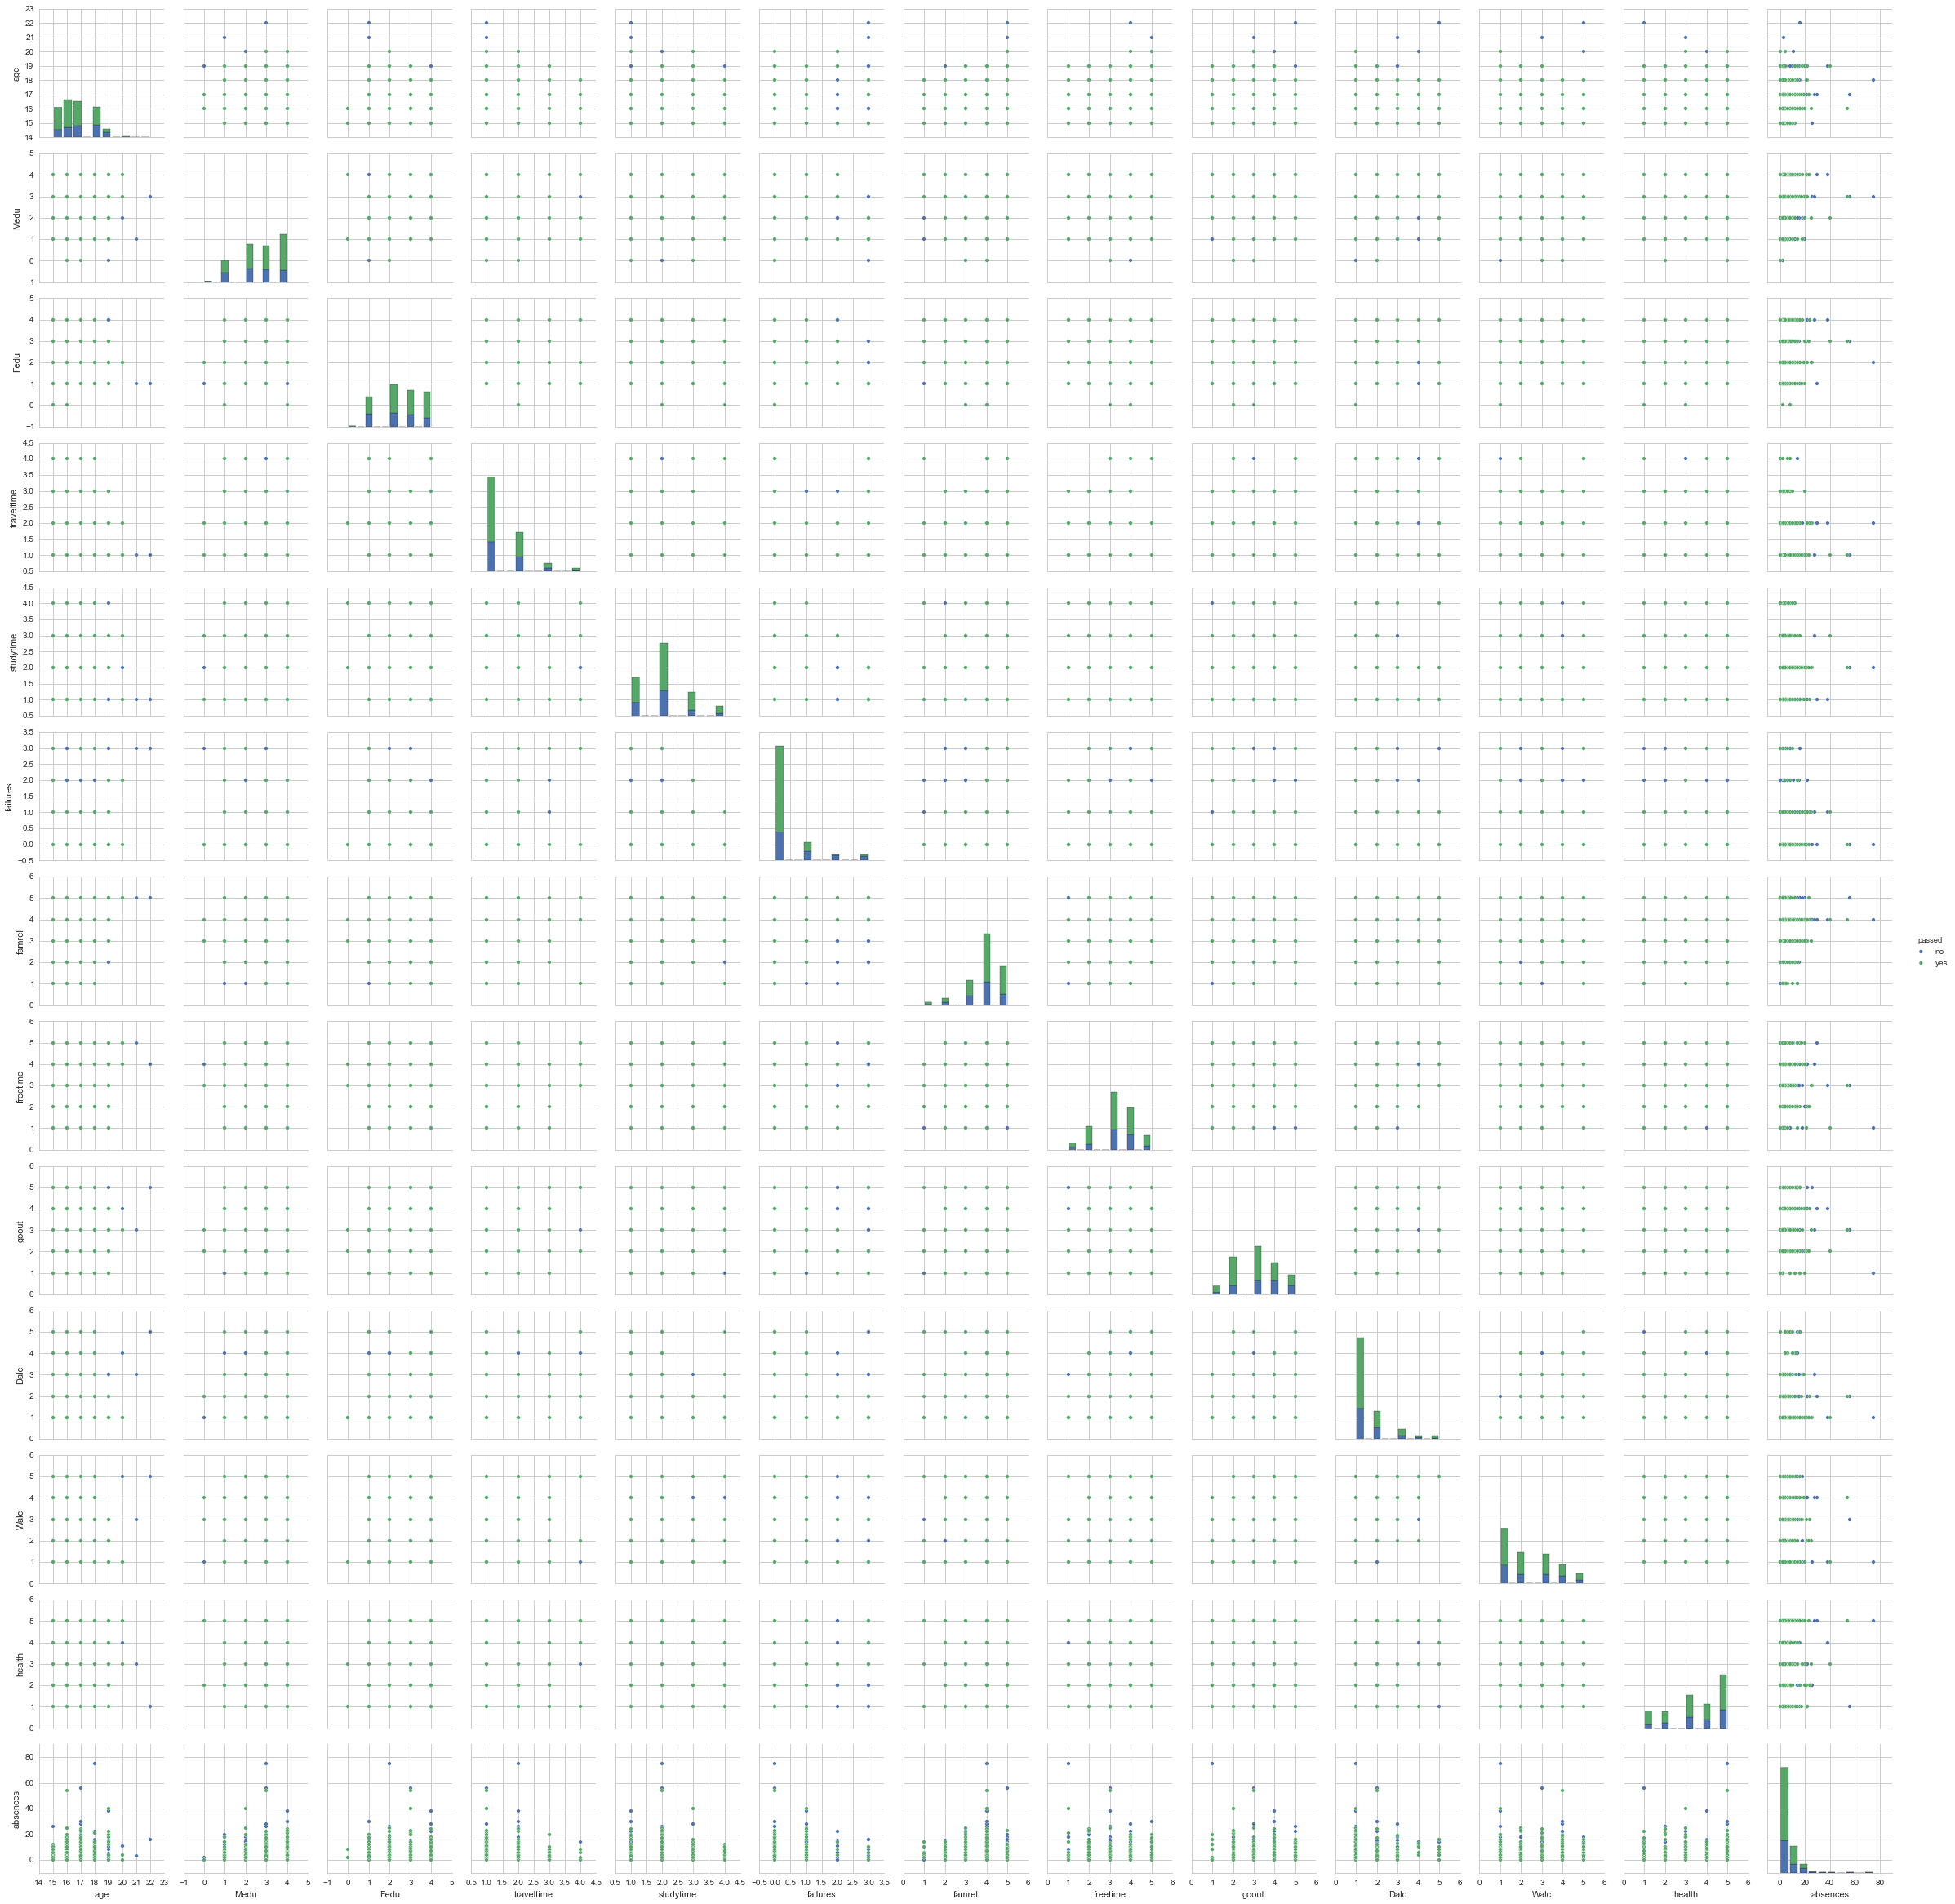

In [116]:
sns.pairplot(student_data, hue='passed')

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [117]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]-1 #31 columns and 30 features are present from above analysis

# TODO: Calculate passing students
n_passed = student_data[student_data['passed'] == 'yes'].shape[0]

# TODO: Calculate failing students
n_failed = student_data[student_data['passed'] == 'no'].shape[0]

# TODO: Calculate graduation rate
grad_rate = float(n_passed)/ float(n_students)*100 #this column feature not in the dataset must calculate

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


In [118]:
grad_rate = float(n_passed)/float(n_students)#had to open new line to perfect this one line of code for above
print grad_rate

0.670886075949


In [124]:
#Added after review
from sklearn.metrics import f1_score
print "\nF1 score for all 'yes' on students: {:.4f}".format(
    f1_score(y_true = ['yes']*n_passed + ['no']*n_failed, y_pred = ['yes']*n_students, pos_label='yes', average='binary'))


F1 score for all 'yes' on students: 0.8030


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [119]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [120]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [98]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, train_size = 0.75, random_state=4)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 296 samples.
Testing set has 99 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: I decided to choose the three methods that I am most interested in and that I would enjoy researching.I think all the listed classification packages are appropriate for this problem, however Logistic Regression is best for identifying a quantity and may not be best for this problem. Here are the three I have chosen: Support Vector Machines (SVM), Stochastic Gradient Descent (SGDC), Gaussian Naive Bayes (GaussianNB):
Support Vector machines
"The criterion used by SVMs is based on margin maximization between the two data classes. The margin is the distance between the hyperplanes bounding each class, where in the hypothetical perfectly separable case no observation may lie. By maximising the margin, we search for the classification function that can most safely separate the classes.(3) 
Strengths: Performs best as a 2 class classifier, multiple classifications can be performed by combining classifiers, trains esily,scales to mutidemensional data, strings and trees can be used as input, has a regularization parameter to avoid overfitting the data, one can use "the Kernal Trick" to engineer the kernal and optimize,
Weaknesses- when does it perform poorly: requires kernal function, data that is centered around a central point in a circumferential shape can be difficult to classify."the theory only really covers the determination of the parameters for a given value of the regularisation and kernel parameters and choice of kernel."(2)
What makes it a good candidate for the problem: The student data should not center around a circumferential point so it should have the ability to classify well.
Real world application example: Used in identification of photograph based data as in hanwriting analysis , Health Care MRI analysis
References:(1) http://www.cs.rutgers.edu/~mlittman/courses/ml04/svm.pdf , (2)http://stats.stackexchange.com/questions/24437/advantages-and-disadvantages-of-svm ,https://core.ac.uk/download/files/153/6302770.pdf (3)
Stochastic Gradient Descent
"is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression......SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features."(1)SGD tries to find minimums or maximums through iteration.
Strengths: efficiency and ease of implementation, supports penalties and loss functions, built in support for sprse data
Weaknesses when does it perform poorly: requires the regularization parameter and regularization, the training data must be shuffled  or use shuffle=True after each iteration, sensitive to feature scaling
What makes it a good candidate for the problem: The data in this problem is not massive and I will be applying SVM
Real world application example: applied to parse through large datasets such as census data
references: http://scikit-learn.org/stable/modules/sgd.html (1)
Gaussian Naive Bayes
"Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features.....naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters."(1)In Guassian Naive Bayes the distribution is assumed to gaussian.
Strengths: Fast,"The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality."(1)
Weaknesses whendoes it perform poorly: known to be a descent classifier and a poor estimator. The probability outputs cannot be relied upon(1)
What makes it a good candidate for the problem: probably not the best candidate for the problem but it's use as a classifier should be useful.
Real world application example: Text classifier such as spam or not in email
references: http://scikit-learn.org/stable/modules/naive_bayes.html(1), H. Zhang (2004). The optimality of Naive Bayes. Proc. FLAIRS http://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf


**

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [99]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
print "done"

done


In [100]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))


### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [101]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
# from sklearn import model_B
# from skearln import model_C


my_random_state= 2
# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = SVC(random_state=my_random_state)
clf_C = SGDClassifier(random_state=my_random_state)
classifiers = [clf_A, clf_B, clf_C]
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=my_random_state, shuffle=False,
       verbose=0, warm_start=False)
# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]
train_sets = [(X_train_100, y_train_100), (X_train_200, y_train_200), (X_train_300, y_train_300)]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test

for clf in classifiers:
    for X, y in train_sets:
        train_predict(clf, X, y, X_test, y_test)

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0140 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.8358.
Made predictions in 0.0040 seconds.
F1 score for test set: 0.6825.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0360 seconds
Made predictions in 0.0070 seconds.
F1 score for training set: 0.8043.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7500.
Training a GaussianNB using a training set size of 296. . .
Trained model in 0.0070 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.7991.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7328.
Training a SVC using a training set size of 100. . .
Trained model in 0.0110 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.8846.
Made predictions in 0.0050 seconds.
F1 score for test set: 0.7211.
Training a SVC using a training set size of 200. . .
Trained model in 0.0570 seconds
Ma

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - GaussianNB**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0040              |0.0010                  |      0.8358      | 0.6825          |  
| 200               |        .0090            |              0.0020    |      0.8043      |    0.7500       |
| 300               |          0.0080         |               0.0020   |       0.7991     |    0.7328       |

** Classifer 2 - SVC**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0080             |          0.0090        |        0.8846    |      0.7211     |
| 200               |     0.0190              |             0.0100     |         0.8599   |       0.7310    |
| 300               |       0.0450            |             0.0100     |         0.8554   |     0.7600      |

** Classifer 3 - SGDClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0050           |            0.0010      |   0.8166         |   0.7389        |
| 200               |         0.0070          |             0.0190     |      0.0000      |    0.0000       |
| 300               |         0.0070          |             0.0010     |      0.0973      |    0.0635       |

In [105]:
# Trying a different random state to evaluate the models more closely
my_random_state= 42
# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = SVC(random_state=my_random_state)
clf_C = SGDClassifier(random_state=my_random_state)
classifiers = [clf_A, clf_B, clf_C]
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=my_random_state, shuffle=False,
       verbose=0, warm_start=False)
# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]
train_sets = [(X_train_100, y_train_100), (X_train_200, y_train_200), (X_train_300, y_train_300)]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test

for clf in classifiers:
    for X, y in train_sets:
        train_predict(clf, X, y, X_test, y_test)

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0060 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.8358.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.6825.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0050 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.8043.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7500.
Training a GaussianNB using a training set size of 296. . .
Trained model in 0.0050 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.7991.
Made predictions in 0.0080 seconds.
F1 score for test set: 0.7328.
Training a SVC using a training set size of 100. . .
Trained model in 0.0070 seconds
Made predictions in 0.0060 seconds.
F1 score for training set: 0.8846.
Made predictions in 0.0050 seconds.
F1 score for test set: 0.7211.
Training a SVC using a training set size of 200. . .
Trained model in 0.0350 seconds
Ma

In [106]:
# Trying a different random state to evaluate the models more closely
my_random_state= 12
# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = SVC(random_state=my_random_state)
clf_C = SGDClassifier(random_state=my_random_state)
classifiers = [clf_A, clf_B, clf_C]
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=my_random_state, shuffle=False,
       verbose=0, warm_start=False)
# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]
train_sets = [(X_train_100, y_train_100), (X_train_200, y_train_200), (X_train_300, y_train_300)]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test

for clf in classifiers:
    for X, y in train_sets:
        train_predict(clf, X, y, X_test, y_test)

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0040 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.8358.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.6825.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0090 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.8043.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7500.
Training a GaussianNB using a training set size of 296. . .
Trained model in 0.0050 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.7991.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7328.
Training a SVC using a training set size of 100. . .
Trained model in 0.0110 seconds
Made predictions in 0.0050 seconds.
F1 score for training set: 0.8846.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.7211.
Training a SVC using a training set size of 200. . .
Trained model in 0.0150 seconds
Ma

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

In [102]:
from sklearn.metrics import f1_score
print "F1 score for predicting all \"yes\" on test set: {:.4f}".format(
    f1_score(y_test, ['yes']*len(y_test), pos_label='yes', average='binary'))

F1 score for predicting all "yes" on test set: 0.7389


In [104]:
from sklearn.metrics import f1_score
print "F1 score for predicting all \"yes\" on full set: {:.4f}".format(
    f1_score(y_train, ['yes']*len(y_train), pos_label='yes', average='binary'))

F1 score for predicting all "yes" on full set: 0.8231


In [122]:
from sklearn.metrics import classification_report
for clf in [clf_A, clf_B, clf_C]:
    print '\nReport for {}:\n'.format(clf.__class__.__name__)
    print classification_report(y_test, clf.predict(X_test))
    print '-'*52


Report for GaussianNB:

             precision    recall  f1-score   support

         no       0.62      0.39      0.48        41
        yes       0.66      0.83      0.73        58

avg / total       0.64      0.65      0.63        99

----------------------------------------------------

Report for SVC:

             precision    recall  f1-score   support

         no       0.86      0.15      0.25        41
        yes       0.62      0.98      0.76        58

avg / total       0.72      0.64      0.55        99

----------------------------------------------------

Report for SGDClassifier:

             precision    recall  f1-score   support

         no       0.42      1.00      0.59        41
        yes       1.00      0.03      0.07        58

avg / total       0.76      0.43      0.29        99

----------------------------------------------------


In [123]:
#I placed the cell here to determine if placement after the above cells would alter the result
from sklearn.metrics import f1_score
print "\nF1 score for all 'yes' on students: {:.4f}".format(
    f1_score(y_true = ['yes']*n_passed + ['no']*n_failed, y_pred = ['yes']*n_students, pos_label='yes', average='binary'))


F1 score for all 'yes' on students: 0.8030


### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: 
Dear Board of Supervisors,
I have run a comparison of 3 supervised learning models to find the best model of the 3 using the student data the company has available. These  3 models were evaluated by comparing their training time,prediction time and F1 score (a measure of performance). The model which out performed the others using these metrics was the Gaussian Naive Bayes. Because performance is very important, we would like a supervised model to give accurate predictions based upon the available data. The second choice, the Support Vector Machine(SVM) obtained an F1 score of 76% which is the highest, however the Gaussian Naive Bayes Model obtained an F1 score of 75% and performed faster than the Support Vector Machine with a .0090 sec yraining time as compared to the SVM 0.0190 training time. Prediction times were 0.0020 and 0.0100 respectively with Gaussian Naive Bayes being faster. The Gaussian Bayes performed the 75% prediction with a data set of 200 and the SVM required a larger dataset of 300 to perform at 76%. Considering the time and expense in gathering data (larger datasets potentially require more equity to obtain) makes comparable performance with a smaller dataset attractive. For these reasons I would recommend using the Gaussian Naive Bayes Model. I can work further to optimize the model to try to increase it's performance level beyond its F1 score of 0.7500. 

Note added after review: The review requested that I run the models at different random states to see a difference in model performance.Running the models with different random states shows a performance difference in Gaussian Naive Bayes verses SVM. with a random state of 42 and 12. SVM performed better as noted above even with random state changes because random states is a random seed (number) we set in order to reproduce our results later.https://www.dataquest.io/blog/machine-learning-python/ Gassian performance best stats are:

Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0050 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.8043.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7500.


where SVM best stats are : 
Training a SVC using a training set size of 296. . .
Trained model in 0.0270 seconds
Made predictions in 0.0440 seconds.
F1 score for training set: 0.8554.
Made predictions in 0.0060 seconds.
F1 score for test set: 0.7600.

Model performance is the best measure as seen in running the models below and SVM was ultimately chosen as the computations were performed and SVM clearly out performed Gaussian NB. Discussed and illustrated in the cells to follow**

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: 
Dear Boad of Supervisors,

Here is an explaination of Gaussian Naive Bayes in layman's terms. The algorithm has performed very well in the real world most famously used in spam filtering. Determining which emails are spam and which are of valid use to the reader. The algorithm is based upon the probability of a certain event happening which most people are very familiar. The model is trained on a portion of the data set and examines each column(feature) of the data without relying on the other features to make a prediction. Features are the line items of information (data) gathered on past students and their performance which we use to make predictions on future student behavior and outcomes. The prediction is the ability to place the requested feature into a certain class like spam or not spam.

Note added after review request to examine different random states: SVM performed better even after random state changes. This is because random states is a random seed(number) we set in order to reproduce our results later. 
![SVM](https://udacity-github-sync-content.s3.amazonaws.com/_imgs/19273/1468014011/optimal-hyperplane.png)
The SVM takes data about past students (age, gender, family, etc), and uses them to create a function that draws a boundary between the students who graduated and those who did not. The boundary should be drawn so as to maximize the distance between the classifications of the students. Often, though, it's not easy to draw a decision boundary in low dimensions, so the SVM separates the passing and failing students by drawing more complex structures in order to make an optimal separation, i.e., correctly classify new objects (test cases) on the basis of the examples that are available (train cases). This situation is depicted in the illustration below in the input space. This seperation is made using a set of mathematical functions called kernels.(http://www.statsoft.com/Textbook/Support-Vector-Machines)
![SVM2](https://udacity-github-sync-content.s3.amazonaws.com/_imgs/19273/1464624531/1gvce.png)
Using this function created with students we already know graduated or not, the SVM can look at new students' data and predict their performance based upon their features that match our classifications See the Feature Space illustration.**

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [71]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score,f1_score, make_scorer
import numpy as np
from sklearn.cross_validation import StratifiedShuffleSplit
# TODO: Create the parameters list you wish to tune
#parameters =  
 

# TODO:initialize the classifier
clf = GaussianNB()
clf.get_params().keys()
[]
# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer, cv=None, verbose=0)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

ValueError: Invalid parameter alpha for estimator GaussianNB. Check the list of available parameters with `estimator.get_params().keys()`.

Gaussian Naive Bayes NB cannot be tuned using Grid Search,so to satisfy the assignment of running grid Search I will apply Grid Search to the SupportVectorMachine

In [87]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score,f1_score, make_scorer
import numpy as np
from sklearn.cross_validation import StratifiedShuffleSplit
# TODO: Create the parameters list you wish to tune

cv = StratifiedShuffleSplit(y_train, random_state=42)

parameters = {'gamma': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
              'C': [1, 10, 100, 200, 300, 400, 500, 600, 700]
             }             

cv = StratifiedShuffleSplit(y_all, random_state=2)

abc = GridSearchCV(SVC(), parameters, cv=cv, scoring='f1_weighted')
abc.fit(X_all, y_all)

# Select the best settings for classifier
best_clf = abc.best_estimator_

# Fit the algorithm to the training data
print "Final Model: "
print best_clf
print '\n'
train_classifier(best_clf, X_train, y_train)

# Test algorithm's performance
print "F1 score for training set: {}".format(predict_labels(best_clf, X_train, y_train))
print "F1 score for test set: {}".format(predict_labels(best_clf, X_test, y_test))



Final Model: 
SVC(C=400, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Trained model in 0.0310 seconds
Made predictions in 0.0160 seconds.
F1 score for training set: 0.842323651452
Made predictions in 0.0160 seconds.
F1 score for test set: 0.786206896552


In [126]:
#added post review
# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label = 'yes')  ## remember, our positive label value is 'yes'

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
cv = StratifiedShuffleSplit(y_train, random_state=2)
clf = SVC()
grid_obj = GridSearchCV(clf, parameters, cv=cv, scoring = f1_scorer) ## let's use the f1_scorer

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)  ## note that we do the grid search on just the training data instead of the full dataset

# Test algorithm's performance
## note that we can use `grid_obj` to generate predictions -- it will essentially give predictions using `grid_obj.best_estimator_`
print "F1 score for training set: {}".format(f1_scorer(grid_obj, X_train, y_train))
print "F1 score for test set: {}".format(f1_scorer(grid_obj, X_test, y_test))

F1 score for training set: 0.842323651452
F1 score for test set: 0.786206896552


In [132]:
#code from http://blog.districtdatalabs.com/visual-diagnostics-for-more-informed-machine-learning-part-3 to view
#heatmap of the Classification_report. Cannot get it to print the heatmap
from matplotlib import colors
from matplotlib.colors import ListedColormap

ddl_heat = ['Red','Blue','Green','Yellow','Orange','White',\
            '#660066','cyan','Aqua','#993300','#669999','#ff0066']
ddlheatmap = colors.ListedColormap(ddl_heat)

def plot_classification_report(cr, title=None, cmap=ddlheatmap):
    title = 'Classification report'
    lines = cr.split('\n')
    classes = []
    matrix = []

    for line in lines[2:(len(lines)-3)]:
        s = line.split()
        classes.append(s[0])
        value = [float(x) for x in s[1: len(s) - 1]]
        matrix.append(value)

    fig, ax = plt.subplots(1)

    for column in range(len(matrix)+1):
        for row in range(len(classes)):
            txt = matrix[row][column]
            ax.text(column,row,matrix[row][column],va='center',ha='center')

    fig = plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(len(classes)+1)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.ylabel('Classes')
    plt.xlabel('Measures')
    plt.show()
    cr = classification_report(y_true, y_pred)
    plot_classification_report(cr)

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: The SVM outperformed the Gaussin Naive BayesNB here. The grid search SVM scored 84% on the training set and scored 0.7862=79% on the test set. I would amend the letter to the Board of Supervisors informing them of the results and reccomend the SVM algorithm due to its superior performance of 78% over 75% Gaussian results. 
Final Model: 
SVC(C=400, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.